# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import random
import requests
from scipy.stats import linregress
import pandas as pd
import json
from api_keys import weather_api_key
from citipy import citipy

city_csv = "../output_data/cities.csv"
city_df = pd.read_csv(city_csv)
city_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [124]:
lat_range = (-90, 90)
lng_range = (-180, 180)

lat_lng = []
cities = []

lat_uni = np.random.uniform(lat_range[0], lat_range[1], size=500)
lng_uni = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lng = zip(lat_uni, lng_uni)

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

284

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [125]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

i=1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    print(json.dumps(response, indent=4, sort_keys=True))
    break

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": -23.12,
        "lon": -134.97
    },
    "dt": 1601448295,
    "id": 4030556,
    "main": {
        "feels_like": 62.13,
        "grnd_level": 1021,
        "humidity": 80,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 70.12,
        "temp_max": 70.12,
        "temp_min": 70.12
    },
    "name": "Rikitea",
    "sys": {
        "country": "PF",
        "sunrise": 1601390497,
        "sunset": 1601434691
    },
    "timezone": -32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 127,
        "speed": 22.57
    }
}


In [126]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

lat = []
lon = []
temp_max = []
humidity = []
speed = []
name = []
dt = []
clouds = []
country = []

i=1
j=1
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        name.append(response["name"])
        dt.append(response["dt"])
        country.append(response["sys"]["country"])
        print(f"Processing Record {i} of Set {j} | {city}")
        i+=1
        
        if i > 50:
            j+=1
            i=1
            
    except: 
        print(f"City not found.Skipping...")
    pass


Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | bengkulu
Processing Record 4 of Set 1 | bayir
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | vaitape
Processing Record 8 of Set 1 | juba
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | codrington
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | vostok
City not found.Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | jala
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | kabalo
Processing Record 20 of Set 1 | suluq
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | bonthe
Processing Record 23 of Set 1 | wexford
Processing Record 24 of Set 1 | poum
Processing Record 2

City not found.Skipping...
City not found.Skipping...
Processing Record 42 of Set 4 | daoukro
City not found.Skipping...
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | victoria
Processing Record 45 of Set 4 | naranjito
Processing Record 46 of Set 4 | skagen
Processing Record 47 of Set 4 | ofunato
Processing Record 48 of Set 4 | chuy
City not found.Skipping...
Processing Record 49 of Set 4 | komsomolskiy
City not found.Skipping...
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | saint-augustin
Processing Record 2 of Set 5 | samarai
Processing Record 3 of Set 5 | korgen
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | hervey bay
City not found.Skipping...
City not found.Skipping...
Processing Record 7 of Set 5 | port-gentil
Processing Record 8 of Set 5 | cap malheureux
Processing Record 9 of Set 5 | hadejia
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp" : temp_max,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : speed,
    "Country" : country,
    "Date" : dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()   

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.12,80,3,22.57,PF,1601448295
1,Pevek,69.70,170.31,38.37,78,97,16.26,RU,1601448296
2,Bengkulu,-3.80,102.27,87.87,59,0,13.96,ID,1601448296
3,Bayir,37.27,28.22,68.00,68,0,3.36,TR,1601448152
4,Butaritari,3.07,172.79,82.35,76,0,10.42,KI,1601448113


In [128]:
weather_data.to_csv("../output_data/weather_data.csv")

In [129]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,16.663858,9.432559,64.335433,73.102362,47.098425,8.175984,1.601448e+09
std,34.779864,92.161504,16.861350,20.080996,39.965526,6.286720,8.198254e+01
min,-54.800000,-175.200000,14.000000,9.000000,0.000000,0.000000,1.601448e+09
25%,-13.602500,-67.317500,51.850000,64.250000,3.000000,3.787500,1.601448e+09
50%,19.475000,13.905000,66.000000,77.500000,40.000000,6.930000,1.601448e+09
75%,44.242500,80.977500,78.010000,87.000000,90.000000,10.830000,1.601448e+09
max,77.480000,172.820000,103.600000,100.000000,100.000000,49.440000,1.601448e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [130]:
weather_humidity = weather_data.loc[weather_data["Humidity"]>100]
weather_humidity["City"].count()

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

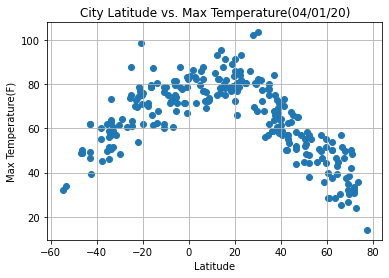

In [131]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature(04/01/20)")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("TemperatureInWorldCities.png")
plt.show()

## Latitude vs. Humidity Plot

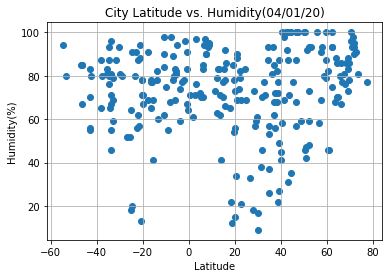

In [132]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

plt.title("City Latitude vs. Humidity(04/01/20)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("HumidityInWorldCities.png")
plt.show()

## Latitude vs. Cloudiness Plot

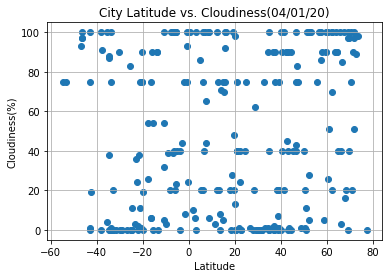

In [133]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

plt.title("City Latitude vs. Cloudiness(04/01/20)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("CloudinessInWorldCities.png")
plt.show()

## Latitude vs. Wind Speed Plot

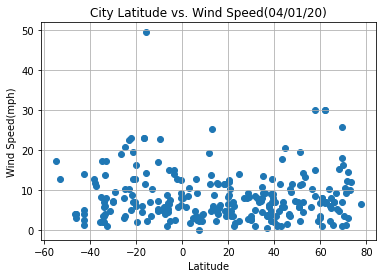

In [134]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

plt.title("City Latitude vs. Wind Speed(04/01/20)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeedInWorldCities.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [135]:
north = weather_data.loc[weather_data["Lat"] >= 0]
north_df = pd.DataFrame(north)

south = weather_data.loc[weather_data["Lat"] < 0]
south_df = pd.DataFrame(south)

Tge r-value is: 0.7576420857330392


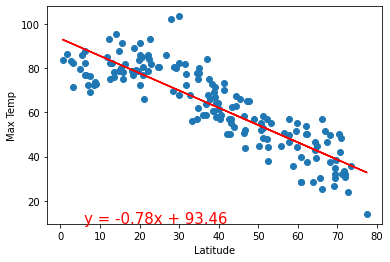

In [136]:
x_values = north_df["Lat"].astype('float')
y_values = north_df["Max Temp"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue**2}")

plt.show()


In Northern Hemisphere, it present strong correlation(r > 0.7) between Latitude and temperatures. We can find the high temps near the equator and low temps near the north pole.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Tge r-value is: 0.5651390982511253


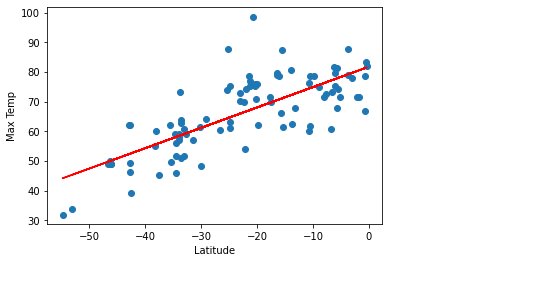

In [137]:
x_values = south_df["Lat"].astype('float')
y_values = south_df["Max Temp"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"The r-value is: {rvalue**2}")

plt.show()


In Southern Hemisphere, it also present moderate correlation(0.5= <r < 0.7) between Latitude and temperatures. We can find the high temps near the equator and low temps near the south pole.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Tge r-value is: 0.03890561337494894


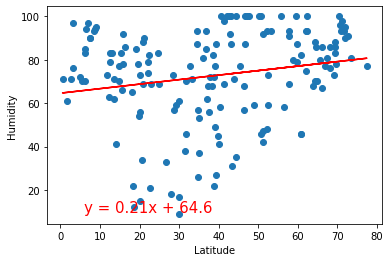

In [138]:
x_values = north_df["Lat"].astype('float')
y_values = north_df["Humidity"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")

plt.show()

The Northern/Southern both have very weak correlation(r < 0.3) between the humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Tge r-value is: 0.0011384336663308103


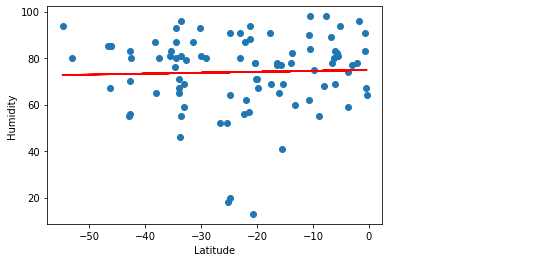

In [139]:
x_values = south_df["Lat"].astype('float')
y_values = south_df["Humidity"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Tge r-value is: 0.0434852241716523


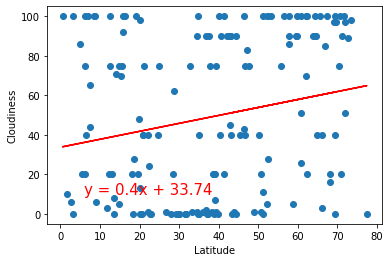

In [140]:
x_values = north_df["Lat"].astype('float')
y_values = north_df["Cloudiness"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")

plt.show()

We could say it has no correlation( r < 0.3) between the cloudiness and the latitude in both Northern/Southern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Tge r-value is: 1.5004696311161898e-05


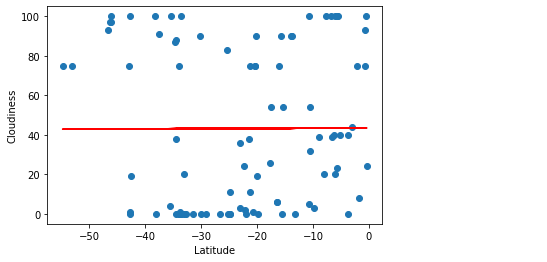

In [141]:
x_values = south_df["Lat"].astype('float')
y_values = south_df["Cloudiness"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Tge r-value is: 0.032938967454474125


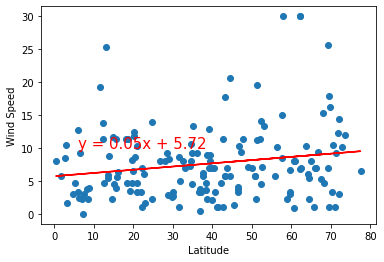

In [142]:
x_values = north_df["Lat"].astype('float')
y_values = north_df["Wind Speed"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue**2}")

plt.show()

It also has no correlation( r < 0.3) between the wind speed and the latitude in both Northern/Southern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Tge r-value is: 0.009641181348361463


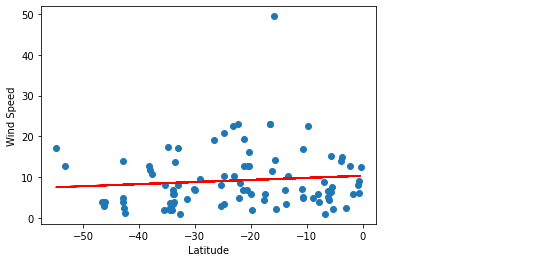

In [143]:
x_values = south_df["Lat"].astype('float')
y_values = south_df["Wind Speed"].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-value is: {rvalue**2}")

plt.show()

Conclusion : The temperature is only factor stronly correlation with the latitude.